In [1]:
# 토픽 모델링(Topic Modeling)을 이용하여 문서의 토픽을 추론할 수 있다.

# 토픽 모델링(Topic Modeling)
# 구조화되지 않은 대량의 텍스트로부터 숨겨져 있는 주제 구조를 발견하기 위한 통계적 추론 알고리즘
# 맥락과 관련된 단서들을 이용하여 의미를 가진 단어들을 클러스터링하여 주제를 추론하는 모델
# 비지도학습으로 문서를 하나 또는 그 이상의 토픽으로 할당

# 하나의 문서에는 여러 가지 토픽이 혼합
# 하나의 토픽에는 여러 개의 단어가 포함
# 문서에 사용한 각각의 단어는 각각의 토픽에 포함
# 문서 안에 있는 단어로 잠재 주제를 만들어 문서별로 어떤 내용으로 구성되었는지 표현

# 토픽 모델링 시각화
# > 토픽 모델링 결과를 간단히 표로 정리하는 것도 좋지만 다양한 시각적 효과와 함께 제시하면 더욱더 효과적임

# LDA(Latent Dirichlet Allocaton)
# 텍스트 마이닝 분석에서 가장 많이 활용되는 토픽 모델링 기법
# 단어의 교환성 가정
# > 교환성 : 단어들의 순서는 상관하지 않고 오로지 단어들의 유무만이 중요하다고 가정
# 단어의 순서를 무시할 경우, 문서는 단순히 그 안에 포함하는 단어들의 빈도수만을 가지고 표혀할 수 있음
# 단어와 문서들의 교환성을 포함하는 혼합 모형

# LDA에서 각각의 문서는 여러 개의 주제를 포함
# 돈의 속성 책을 추천한다.

# LDA의 계산과정을 시험문제로 출제할 예정이다.


In [21]:
import random

# LDA 코드를 작성해보자.
# - 관련 라이브러리 불러오기
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.tokenize import RegexpTokenizer

import random
random.seed(10)

In [22]:
tokenizer = RegexpTokenizer("[\w]+")
stop_words = stopwords.words("english")
p_stemmer = PorterStemmer()

In [23]:
# LDA 기반의 토픽 모델링
doc_a = "Brocolliis good to eat. My brother likes to eat good broccoli, but not my mother."

doc_b = "My mother spends a lot of time driving my brother around to baseball practice."

doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."

doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."

doc_e = "Health professionals say that broccoli is good for your health."

doc_f = "Big data is a term used to refer to data sets that are too large or complex for traditional data-processing application software to adequately deal with."

doc_g = "Data with many cases offer greater statistical power, while data with higher complexity may lead to a higher false discovery rate."

doc_h = "Big data was originally associated with three key concepts: volume, variety, and velocity."

doc_i = "A 2016 definition states that 'Big data represents the information assets characterized by such a high volume, velocity and variety to require specific technology and analytical methods for its transformation into value."

doc_j = "Data must be processed with advanced tools to reveal meaningful information."

In [24]:
# for loop 문으로 빈 리스트 texts에 문서별 단어들을 입력하면, 문서별 단어들은 소문자로 변환한 후 토크나이징, 불용어 제거, 엉근 추출과정으로 전처리

doc_set= [doc_a, doc_b, doc_c, doc_d, doc_e, doc_f, doc_g, doc_h, doc_i, doc_j]
texts = []

for w in doc_set:
    raw = w.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens =[i for i in tokens if not i in stop_words]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)

texts

[['brocollii',
  'good',
  'eat',
  'brother',
  'like',
  'eat',
  'good',
  'broccoli',
  'mother'],
 ['mother',
  'spend',
  'lot',
  'time',
  'drive',
  'brother',
  'around',
  'basebal',
  'practic'],
 ['health',
  'expert',
  'suggest',
  'drive',
  'may',
  'caus',
  'increas',
  'tension',
  'blood',
  'pressur'],
 ['often',
  'feel',
  'pressur',
  'perform',
  'well',
  'school',
  'mother',
  'never',
  'seem',
  'drive',
  'brother',
  'better'],
 ['health', 'profession', 'say', 'broccoli', 'good', 'health'],
 ['big',
  'data',
  'term',
  'use',
  'refer',
  'data',
  'set',
  'larg',
  'complex',
  'tradit',
  'data',
  'process',
  'applic',
  'softwar',
  'adequ',
  'deal'],
 ['data',
  'mani',
  'case',
  'offer',
  'greater',
  'statist',
  'power',
  'data',
  'higher',
  'complex',
  'may',
  'lead',
  'higher',
  'fals',
  'discoveri',
  'rate'],
 ['big',
  'data',
  'origin',
  'associ',
  'three',
  'key',
  'concept',
  'volum',
  'varieti',
  'veloc'],
 ['201

In [25]:
# 문서-단어 매트릭스를 형성
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
corpus

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 2), (5, 1), (6, 1)],
 [(2, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)],
 [(9, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1)],
 [(2, 1),
  (6, 1),
  (9, 1),
  (20, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1)],
 [(0, 1), (4, 1), (17, 2), (31, 1), (32, 1)],
 [(33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 3),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1)],
 [(19, 1),
  (36, 1),
  (37, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 2),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1)],
 [(35, 1),
  (37, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1)],
 [(35, 1),
  (37, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
 

In [26]:
# 토픽 개수를 3으로 지정하여 LDA 모델 구성 및 토픽별 출력 단어들을 5개로 지정하여 출력
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary)
ldamodel.print_topics(num_words=5)

[(0,
  '0.043*"drive" + 0.029*"data" + 0.029*"mother" + 0.028*"brother" + 0.028*"pressur"'),
 (1,
  '0.050*"good" + 0.035*"eat" + 0.035*"health" + 0.035*"broccoli" + 0.025*"brother"'),
 (2,
  '0.086*"data" + 0.036*"higher" + 0.036*"complex" + 0.023*"big" + 0.021*"may"')]

In [27]:
ldamodel.get_document_topics(corpus)[0]

[(0, 0.034876235), (1, 0.93162006), (2, 0.03350368)]

In [28]:
# LDA 토픽 개수 지정 - Perplexity
# Perplexity : 정보학에서 혼란도를 의미하여 특정 확률 모델이 실제로 관측되느느 값을 얼마나 잘 예측 하는 지 평가할 때 사용

# 토픽 모델링도 문헌 집합 내 용어 출현 횟수를 바탕으로 문헌 내 주제 출현 확률과 주제 내 용어 출현 확률을 계산하는 확률 모델이므로 Perplexity가 사용될 수 있음

# 토픽 개수가 증가할수록 Perplexity는 감소하는 경향을 보임

# 특정 토픽 개수 지점을 지나면 더이상 Perplexity는 감소하지 않고 수렵하는 지점이 등장
# > 이때의 Perplexity를 해당 모델의 최종 Perplexity로 결정

# Perplexity가 작으면 작을수록 해당 토픽 모델은 실제 문헌 결과를 잘 반영한다는 뜻으로 해석

# Topic Coherence : 실제로 사람이 해석하기에 적합한 평가 척도를 만들기 위해서 제시된 척도

# 토픽 모델링 결과로 나온 주제들에 관해 각각의 주제에서 상위 N개의 단어들을 추출

# 모델링이 잘되었을 수록 한 주제 안에는 의미론적으로 유사한 단어가 주로 형성됨

# > 상위 단어 간의 유사도를 통해 평균을 계산하면 실제로 해당 주제가 의미론적으로 일치하는 단어들끼리 형성되었는지를 파악할 수 있음

In [29]:
from gensim.models import CoherenceModel

print("\nPerplexity", ldamodel.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, topn=10)
coherence_lda = coherence_model_lda.get_coherence()
print("\nCoherence Score: ", coherence_lda)


Perplexity -4.9954835346032835

Coherence Score:  0.4165323804568623


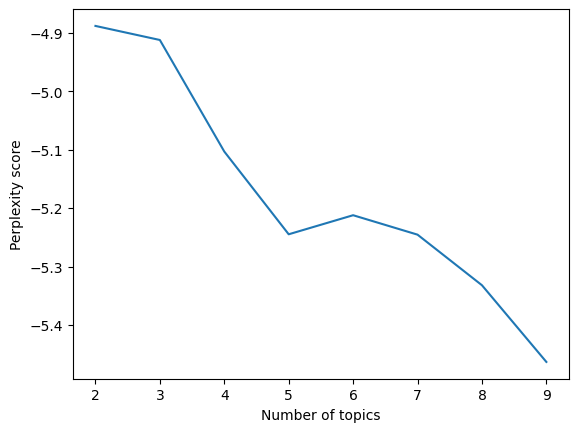

In [30]:
from matplotlib import pyplot as plt

perplexity_value = []
for i in range(2, 10):
    ldamoel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_value.append(ldamoel.log_perplexity(corpus))

x = range(2, 10)
plt.plot(x, perplexity_value)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

In [31]:
coherence_values = []
for i in range(2, 10):
    ldamoel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamoel, texts=texts)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

coherence_values

[0.41108210115568217,
 0.32437551809404,
 0.4190765432454241,
 0.43367389661418876,
 0.4830484714614174,
 0.48036794817466133,
 0.44626579711771003,
 0.49709711252523714]

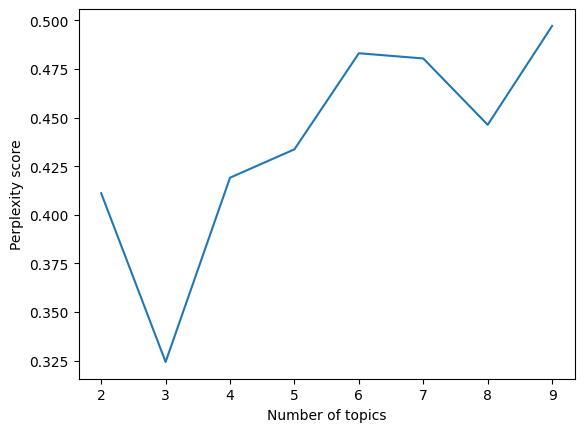

In [32]:
x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()